# **Project: Classificaiton factory Machine Failure**

Random notes: Try to add images of the gears of the system 

Heatmap of features to target variable using some analysis value

drop usless features from EDA

Encode categorical data like Quality

Reasearch Stupid baseline and how to implement

Select a few algorithms to test on, based on certain metric then line graph train test scores 

Add Model improvement, --> need to reasearch more 

Hyperparameter Tuning and like lasso regualization
Cross validating 

### Variables that i can play around with

*   Various Matric to evaluate
*   train test split test sizes 
*   Method of handing Missing data --> Drop,impute etc
*   Encoding and Feature enginering ( this one idk actually )
*   **Differnt Algorithims to fit model** 
*   beta thingy ( need research more ) 
*   probability threshold for various algorithm: i.e ROC curve

Research this :D
sklearn.preprocessing.PolynomialFeatures¶


# **Project Initilzation**

## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, learning_curve ,cross_val_score ,GridSearchCV

from sklearn.metrics import fbeta_score, make_scorer,classification_report,confusion_matrix, roc_auc_score

## Loading Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/factory_data (classification).csv')
df.head()

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0


# Understanding features

# Exploratory Data Analysis

In [ ]:
df_eda = df.copy()

In [ ]:
df_eda.shape

(20000, 9)

There are **20k** rows and **9** columns in the Factory datset

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


It is to be noted that features:

 *Ambient T (C)*,*Process T (C)*,*Rotation Speed (rpm)* and *Tool Wear (min)* are **Quantitative** features

*Quality* is a **nominally valued categorical** feature



### Check for null values

In [ ]:
df_eda.isna().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

Features *Quailty* , *Process T (C)* and *Rotation Speed (rpm)* have missing values

In [ ]:
descriptive_stats = df_eda.describe().T
descriptive_stats["Proportion of Most Frequent Value"] = descriptive_stats["freq"] / len(df) * 100
descriptive_stats.sort_values("Proportion of Most Frequent Value", ascending=False)
descriptive_stats


,count,mean,std,min,25%,50%,75%,max
Unique ID,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
Ambient T (C),20000.0,26.904930,2.000834,22.15,25.25,26.95,28.45,31.45
Process T (C),19600.0,36.904291,1.483647,32.55,35.75,36.95,37.95,40.75
Rotation Speed (rpm),18812.0,1538.795397,178.674963,1168.00,1423.00,1503.00,1613.00,2886.00
Torque (Nm),20000.0,39.986910,9.968684,3.80,33.20,40.10,46.80,76.60
Tool Wear (min),20000.0,107.951000,63.652555,0.00,53.00,108.00,162.00,253.00
Machine Status,20000.0,0.033900,0.180976,0.00,0.00,0.00,0.00,1.00


What percentage of target feature is failure idk rephrase later

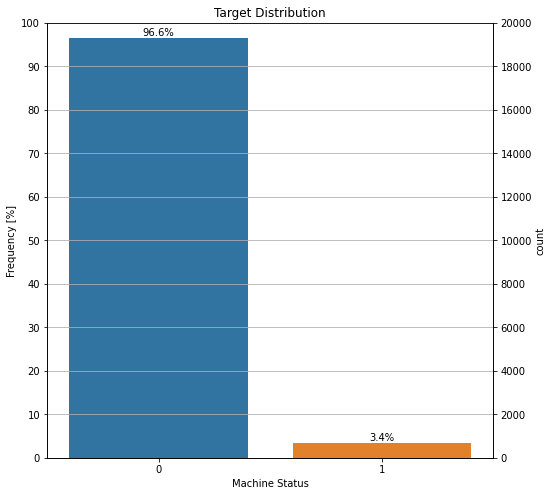

In [ ]:
import matplotlib.ticker as ticker

ncount = len(df_eda)

plt.figure(figsize=(8,8))
ax = sns.countplot(x="Machine Status", data=df_eda)
plt.title('Target Distribution')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

Unbalanced class explan smt smt

Just testing dropping all missing data for now can change later

In [3]:
df_drop = df.copy()

In [4]:
df_drop = df_drop.dropna(axis=0,how='any')

df_drop

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
...,...,...,...,...,...,...,...,...,...
19993,19994,S54280,L,25.75,35.35,1401.0,47.3,10,0
19994,19995,S12929,L,25.75,35.25,1634.0,27.9,12,0
19996,19997,Z59525,H,25.85,35.35,1632.0,31.8,17,0
19998,19999,K42424,H,25.95,35.65,1408.0,48.5,25,0


In [5]:
df_drop.isna().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

## Dropping Usless Columns 

In [6]:
df_drop = df_drop.drop(columns=['Unique ID','Product ID'])

df_drop.columns

Index(['Quality', 'Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)',
       'Torque (Nm)', 'Tool Wear (min)', 'Machine Status'],
      dtype='object')

## Feature Scaling(Standardisation)

In [7]:
#Saving a copy of the df.impute into df_scaled
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

num_col = ["Ambient T (C)" ,"Process T (C)",	"Rotation Speed (rpm)", "Torque (Nm)", "Tool Wear (min)"]
### Write your code here ###
df_drop[num_col] = scaler.fit_transform(df_drop[num_col] )
### End ###
df_drop

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,M,-0.975545,-0.976958,0.067988,0.281585,-1.699265,0
1,L,-0.925632,-0.909726,-0.730999,0.632603,-1.652128,0
2,L,-0.975545,-1.044190,-0.228140,0.943504,-1.620704,0
3,L,-0.925632,-0.976958,-0.591316,-0.049375,-1.589279,0
4,L,-0.925632,-0.909726,-0.730999,0.000771,-1.557854,0
...,...,...,...,...,...,...,...
19993,L,-0.576238,-1.044190,-0.770111,0.732893,-1.542142,0
19994,L,-0.576238,-1.111422,0.531736,-1.212748,-1.510718,0
19996,H,-0.526325,-1.044190,0.520561,-0.821614,-1.432156,0
19998,H,-0.476411,-0.842494,-0.730999,0.853242,-1.306458,0


## Ordinal Encoding

In [8]:
#List unique value of flat_type with unique()
df_drop['Quality'].unique()

array(['M', 'L', 'H'], dtype=object)

In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoded = OrdinalEncoder()
encoded.fit([
        ['M'],
        ['L'],
        ['H']
    ])
df_encoded = encoded.transform(df_drop[["Quality"]])
### End ###
df_encoded

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[2.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [2.]])

In [10]:
#save Quailty type column of df_drop into df_encoded 
df_drop["Quality"] = df_encoded

In [11]:
df_drop

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,2.0,-0.975545,-0.976958,0.067988,0.281585,-1.699265,0
1,1.0,-0.925632,-0.909726,-0.730999,0.632603,-1.652128,0
2,1.0,-0.975545,-1.044190,-0.228140,0.943504,-1.620704,0
3,1.0,-0.925632,-0.976958,-0.591316,-0.049375,-1.589279,0
4,1.0,-0.925632,-0.909726,-0.730999,0.000771,-1.557854,0
...,...,...,...,...,...,...,...
19993,1.0,-0.576238,-1.044190,-0.770111,0.732893,-1.542142,0
19994,1.0,-0.576238,-1.111422,0.531736,-1.212748,-1.510718,0
19996,0.0,-0.526325,-1.044190,0.520561,-0.821614,-1.432156,0
19998,0.0,-0.476411,-0.842494,-0.730999,0.853242,-1.306458,0


# Extracting Features, `X` and Target Variable, `y`

In [12]:
X = df_drop.drop(columns=['Machine Status'])
y = df_drop['Machine Status']

In [13]:
X

,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min)
0,2.0,-0.975545,-0.976958,0.067988,0.281585,-1.699265
1,1.0,-0.925632,-0.909726,-0.730999,0.632603,-1.652128
2,1.0,-0.975545,-1.044190,-0.228140,0.943504,-1.620704
3,1.0,-0.925632,-0.976958,-0.591316,-0.049375,-1.589279
4,1.0,-0.925632,-0.909726,-0.730999,0.000771,-1.557854
...,...,...,...,...,...,...
19993,1.0,-0.576238,-1.044190,-0.770111,0.732893,-1.542142
19994,1.0,-0.576238,-1.111422,0.531736,-1.212748,-1.510718
19996,0.0,-0.526325,-1.044190,0.520561,-0.821614,-1.432156
19998,0.0,-0.476411,-0.842494,-0.730999,0.853242,-1.306458


In [14]:
y

0        0
1        0
2        0
3        0
4        0
        ..
19993    0
19994    0
19996    0
19998    0
19999    0
Name: Machine Status, Length: 17529, dtype: int64

In [15]:
# Import train_test_split function from sklearn library
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Model Fitting and Prediction

In [21]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression class from sklearn.linear_model
from sklearn.metrics import f1_score

logrex = LogisticRegression()

logrex.fit(X_train, y_train)

prediction = logrex.predict(X_test)

print(f"Test F1 Score\t:{f1_score(y_test, prediction)}") # Test F1 Score

Test F1 Score	:0.3076923076923077


In [17]:
def plot_learning_curve(model, X, y, scoring, cv = StratifiedKFold(shuffle=True, random_state = 42), train_sizes = np.linspace(.1, 1.0, 10)):
  try:
    model_name = type(model[-1]).__name__ 
  except:
    model_name = type(model).__name__
  fig, ax = plt.subplots(figsize=(10, 8))
  train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv = cv, n_jobs = -1, train_sizes = train_sizes, scoring=scoring)
  scores = pd.DataFrame({
      "Train Sizes" : np.tile(train_sizes, train_scores.shape[1]),
      "Train Scores" : train_scores.flatten(),
      "Test Scores" : test_scores.flatten()
  }).melt(value_vars=["Train Scores", "Test Scores"], var_name="Score Type", value_name="Scores", id_vars=["Train Sizes"])
  sns.lineplot(data=scores, x="Train Sizes", y="Scores", hue="Score Type", ax = ax)
  ax.set_title(f"Learning Curve of {model_name}")
  ax.set_ylabel(f"{scoring}")
  ax.set_xlabel("Train Sizes")
  return fig

In [18]:
f1_score = make_scorer(fbeta_score, beta = 2) # define our f2 score

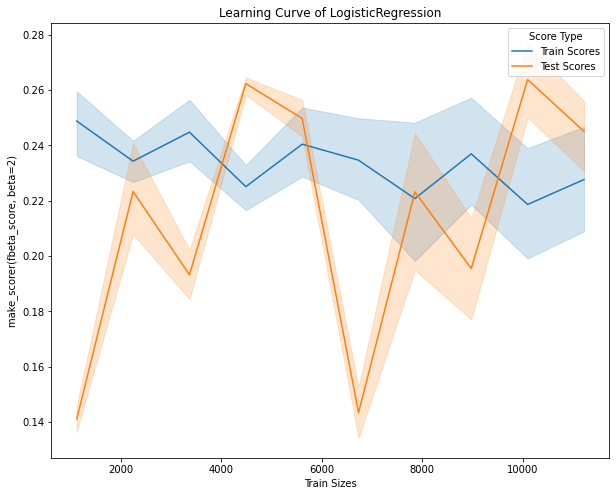

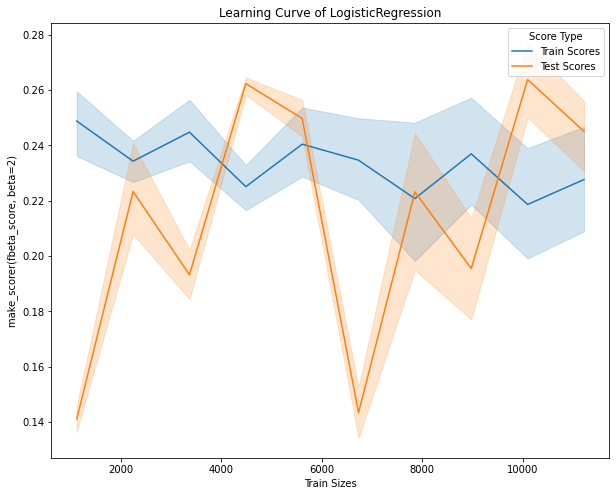

In [19]:
plot_learning_curve(logrex,X_train,y_train,scoring=f1_score)

using classification report on logistic reg

In [20]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3400
           1       0.83      0.19      0.31       106

    accuracy                           0.97      3506
   macro avg       0.90      0.59      0.65      3506
weighted avg       0.97      0.97      0.97      3506

[[3396    4]
 [  86   20]]


## ROC AUC score testing for logreg 

Rmb to add context to explain this with how ROC works and why i used

In [34]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logrex.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logrex,X,y,cv=5,scoring='f1')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8916537180910101
AUC scores computed using 5-fold cross-validation: [0.2972973  0.34355828 0.1969697  0.27710843 0.28368794]


## HyperParamter Tuning for Logistic Regression

In [36]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5,scoring='f1')

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.29321774461846845


In [ ]:
logreg_cv.cv_results_

### Plotting Hyperparam tuning

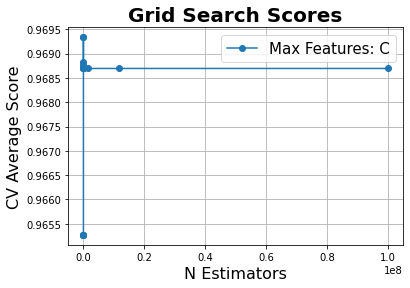

In [29]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(logreg_cv.cv_results_, c_space, "C", 'N Estimators', 'Max Features')

## Refit logistic regression

In [32]:
logrex2 = LogisticRegression(C=0.05179474679231213)

logrex2 = logrex2.fit(X_train,y_train)
prediction2 = logrex2.predict(X_test)


In [33]:
print(classification_report(y_test,prediction2))
print(confusion_matrix(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3400
           1       0.89      0.15      0.26       106

    accuracy                           0.97      3506
   macro avg       0.93      0.58      0.62      3506
weighted avg       0.97      0.97      0.96      3506

[[3398    2]
 [  90   16]]
